# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

<b> (1) What test is appropriate for this problem? </b>

<b> ans: </b> An appropriate test is a two-tail comparison of sample proportions.

Does CLT apply?

<span style="color:blue"> <b> ans: </b> Yes. CLT states that the sampling distribution of a population that has an unknown probability distribution, given that the sample size n is large, will yield an approximately normal sampling distribution. For a sample proportion, in order for the samples to meet the conditions for CLT: </span>
> (1) Average number of successes, np, must be at least 10.   
<span style="color:blue"> In the present case, for black race, np=157 and, for white race, np=235. </span>   
> (2) Average number of failures, n(1-p), must be at least 10.   
<span style="color:blue"> In the present case, for black race, n(1-p)=2278 and, for white race, n(1-p)=2200. </span>

ref.:   
D.C.Montgomery, G.C.Runger, and N.F. Hubele, "Engineering Statistics", John Wiley and Sons, Second Edition, 2001, pg. 123.  
D. Rumsey, "Statistics Essentials for Dummies", Wiley Publishings, Inc., 2010, Chpt. 6.




<b> (2) What are the null and alternate hypotheses? </b>

<span style="color:blue"> <b> ans: </b>  
H0: Racially-inclined sounding names have no significant impact on the rate of callbacks (i.e. $\mu_{(p_{black} = p_{white})}$=0).  
Ha: Racially-inclined sounding names have a significant impact on the rate of callbacks (i.e. $\mu_{(p_{black} \neq\ p_{white})}$=0) 
</span>


<b> (3) Compute margin of error, confidence interval, and p-value. </b>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [6]:
data.head() #inspect data

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [7]:
data.info() #inspect data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [8]:
#Calculate the number of calls for each race 
b_calls= data[data['race']=='b']['call'].sum()
w_calls= data[data['race']=='w']['call'].sum()
print('No. of calls to black applicants:', b_calls)
print('No. of calls to white applicants:', w_calls)
print('\n')

#calculate the total number of applicants for each race
b_applicants=data['call'][data['race']=='b'].count()
w_applicants=data['call'][data['race']=='w'].count()

print('Black calls:', b_applicants)
print('White calls:', w_applicants)
print('\n')

#calculate proportions
p_b_calls=b_calls/b_applicants
p_w_calls=w_calls/w_applicants

print('p_b_calls:', p_b_calls)
print('p_w_calls:', p_w_calls)


No. of calls to black applicants: 157.0
No. of calls to white applicants: 235.0


Black calls: 2435
White calls: 2435


p_b_calls: 0.064476386037
p_w_calls: 0.0965092402464


Thus, the population proportion of blacks receiving calls is 6.45% and the population proportion of whites receiving calls is 9.65% 

(a) Margin of error and confidence interval  
<span style="color:blue"> <b> ans: </b> The margin of error is 0.0153 and the confidence interval at 95% is 0.0168-0.0473. </span>

In [9]:
#Calculate margin or error, and subsequently confidence interval.
#At a 95% confidence interval, the margin of error is:
z0_025=stats.norm.ppf(0.025)
print('Z0.025: ', z0_025) #check
margin_of_error=z0_025*np.sqrt((p_b_calls*(1-p_b_calls)/b_applicants)+(p_w_calls*(1-p_w_calls)/w_applicants))
print('margin of error: ', np.abs(margin_of_error))

conf_interval=((p_w_calls-p_b_calls)-np.abs(margin_of_error),(p_w_calls-p_b_calls)+np.abs(margin_of_error))
print('\n')
print('conf_interval: (%.4f,%.4f)' %(conf_interval[0],conf_interval[1]))


Z0.025:  -1.95996398454
margin of error:  0.0152551260282


conf_interval: (0.0168,0.0473)


<span style="color:blue">
<b> ans: </b> The confidence interval at 95% is: 0.0168-0.0473.
</span>

<span style="color:blue">
<b> conclusion: </b> The 95% confidence interval on the difference does not include zero. This implies that the difference is quite significant.
</span>

(b) p-value calculation

<span style="color:blue"> 
<b> ans: </b> When calculated both using statsmodel.api and using the statistical formula, the p-values are 3.984e-05.
</span>

(b1) calculate p-value using statsmodel.api

In [10]:
import statsmodels.api as sm

#z-test
z0, p_value = sm.stats.proportions_ztest([b_calls, w_calls], [b_applicants, w_applicants])

print('z-score:', z0, 'p-value:', p_value)

z-score: -4.10841215243 p-value: 3.98388683759e-05


(b2) calculate p-value using the statistical formula

In [11]:
#First, calculate the pooled estimate of the population proportions
p_bar=(b_calls+w_calls)/(b_applicants+w_applicants)
print('p-bar:', p_bar) #check
print('\n')

#Calculate the test statistic, z:
z=(p_b_calls-p_w_calls)/np.sqrt((p_bar*(1-p_bar))*((1/b_applicants)+(1/w_applicants)))
print('z:', z)


#The z0.025 critical (two-tail test) is
print('\n')
print('z0.025 critical:', stats.norm.ppf(0.025))

#calculate p-value
print('p-value:', 2*stats.norm.cdf(z)) #we multiply by two, since it is a two-tail test.

p-bar: 0.0804928131417


z: -4.10841215243


z0.025 critical: -1.95996398454
p-value: 3.98388683759e-05


<span style="color:blue">
<b> conclusion: </b> Since z < z-critical, we reject H0. That is, the population means are significantly different between the two races at a low p-value of 3.984e-5. Racially-inclined sounding names have a significant impact on the rate of callbacks.
</span>

<b> (4) Write a story describing the statistical significance in the context or the original problem. </b>

## Title: Race may not be the sole contributor on the rate of callbacks for resumes.

While a two-tail test comparison of sample proportions concludes that the population means are significantly different between the two races at a low p-value of 3.984e-5 the histograms of various other numerical factors (56 altogether) show that the applicants with white sounding race mostly exceed the applicants with black sounding race in various numerical categories. Further tests are recommended before taking on any positions. For this, description on the column names is needed. 

<b> (5) Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis? </b>

<span style="color:blue"> <b> ans: </b> normalizing the numerical factors and plotting into bar charts for each of the two race reveals that, for the most part, the percentage of the white race exceed the black race; except for fracblack_empzip and transcom. </span>

No. of numerical columns: 56


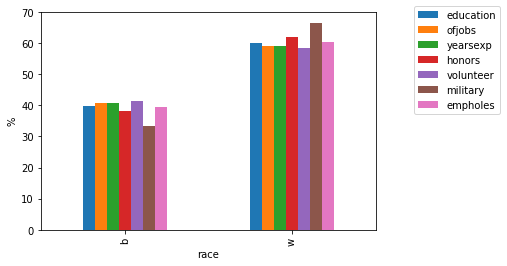

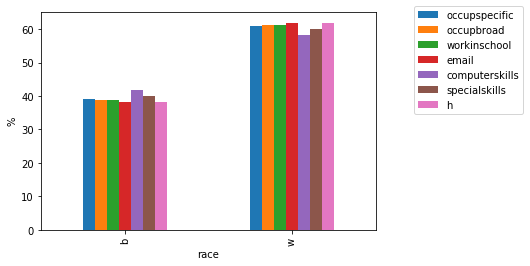

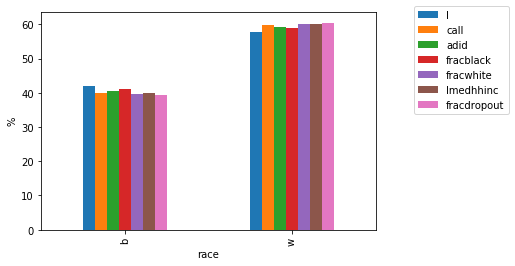

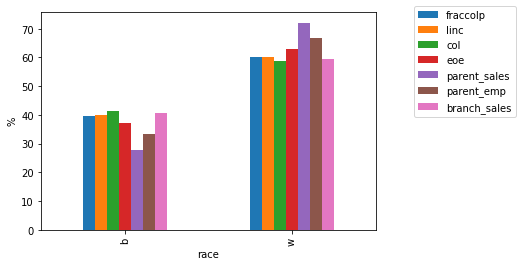

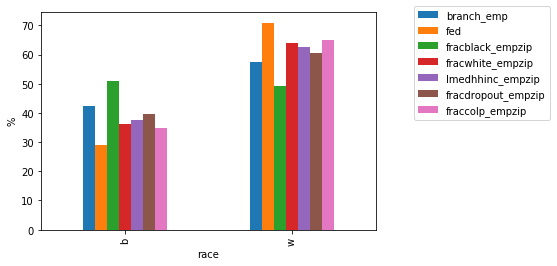

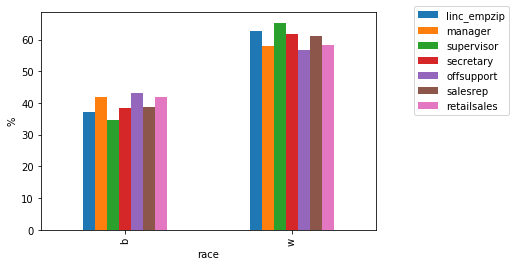

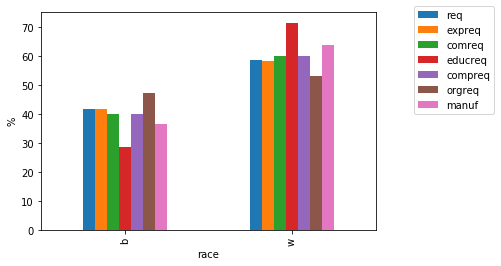

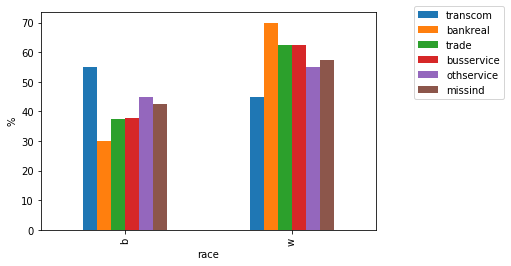

In [28]:
#strategy: compare other factors than number of calls

#steps:
#1. Convert all numerical factors into percentage for each race.
#   only focus on ones who got interview.
#2. Plot out the bar charts.

#1a. To convert all numerical factors into percentage
data_got_calls=pd.DataFrame() #create a new DataFrame to contain info. only for those who received calls
data_got_calls=data[data['call']==1] #filter for only those who got calls

#1b. express values in percentage
#https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value

for col in data_got_calls.columns:
    if data_got_calls[col].dtype==object and col != 'race':
        #print(col) #these are columns that are type objects. Exclude from the list, except for race
        data_got_calls=data_got_calls.drop(col, axis=1)

print('No. of numerical columns:', len(data_got_calls.columns))        
        
col_tot=data_got_calls.iloc[:,data_got_calls.columns != 'race'].sum(axis=0) #calculate sum for each column for normalization, except 'race'.
data_got_calls_pct=100*data_got_calls.iloc[:,data_got_calls.columns != 'race'].div(col_tot,axis=1) #normalize each column
data_got_calls_pct['race']=data_got_calls['race'][data_got_calls.index==data_got_calls_pct.index]#add back the race column

#2. plot bar charts in chunks for easy inspection

for col_no in range(int(len(data_got_calls_pct.columns)/7)):
    #print(7*col_no,',',7*(col_no+1))      
    
    data_got_calls_pct.groupby('race').sum().iloc[:,7*col_no:7*(col_no+1)].plot.bar() #groupby race and aggregate by sum
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.ylabel('%')


    plt.show()


In [13]:
#check which factors are higher for black race than white race from those who got calls
for col in data_got_calls_pct.columns:
    if data_got_calls_pct[col][data_got_calls_pct['race']=='b'].sum()>data_got_calls_pct[col][data_got_calls_pct['race']=='w'].sum(): #print out just black race.
        print(col)

fracblack_empzip
transcom


<b> Taking it one-step further, let's look at the percentage number of calls for these two columns </b>

Stating the hypothesis:  
> H0: Transcom being equal to 1  has no significant impact on the rate of callbacks.  
> Ha: Transcom  being equal to 1 has a significant impact on the rate of callbacks.

In [14]:
#inspect data
data.loc[:,['fracblack_empzip','transcom']].info()
#Upon inpspection, it is seen that the factor 'fracblack_empzip' contains many missing data. 
#  Therefore, the analysis is focused on the factor 'transcom'.  
print('\n')

###For those with 'transcom'=1, get the 'call' column and do a sample proportion test!!!
bw_transcom_1=data[data['transcom']==1]
bw_transcom_1 #check

b_transcom_1_calls=bw_transcom_1['call'][bw_transcom_1['race']=='b'].sum()
w_transcom_1_calls=bw_transcom_1['call'][bw_transcom_1['race']=='w'].sum()

print('black call', b_transcom_1_calls) #check
print('white call', w_transcom_1_calls) #check
print('\n')

###for comparison, caculate the opposite scenario: got calls, prop of transcom! They are one and the same.
#carry out comparative test to check if the transcoms are different by race.
#z-test
bw_transcom_1=data[data['transcom']==1]

#separatate by race
b_transcom_1=bw_transcom_1[bw_transcom_1['race']=='b']['call'].count() #total number of black race with transcom=1
w_transcom_1=bw_transcom_1[bw_transcom_1['race']=='w']['call'].count() #total number of white race with transcom=1

print('No. of black race with transcom=1: ', b_transcom_1) #check
print('No. of white race with transcom=1: ', w_transcom_1) #check

#Calculate statistic

z0_transcom, p_value_transcom = sm.stats.proportions_ztest([b_transcom_1_calls, w_transcom_1_calls], [b_transcom_1, w_transcom_1])
print('\n')
print('z-score:', z0_transcom, 'p-value:', p_value_transcom)

if p_value_transcom > 0.025:
    print('Reject H0 at an alpha=0.05. That is, transcom has no significant impact on the rate of callbacks.')
else:
    print('Fail to reject H0 at an alpha=0.05. That is, transcom has a significant impact on the rate of callbacks.')

print('\n')    
print('NOTE: While the result concludes that transcom has a significant impact on the rate of callbacks, it is worth noting \
that np for white race is 9.0, which is less than 10.0. More samples are needed to \
carry out a more robust test')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 2 columns):
fracblack_empzip    1918 non-null float32
transcom            4870 non-null float32
dtypes: float32(2)
memory usage: 76.1 KB


black call 11.0
white call 9.0


No. of black race with transcom=1:  74
No. of white race with transcom=1:  74


z-score: 0.480884601542 p-value: 0.630598517391
Reject H0 at an alpha=0.05. That is, transcom has no significant impact on the rate of callbacks.


NOTE: While the result concludes that transcom has a significant impact on the rate of callbacks, it is worth noting that np for white race is 9.0, which is less than 10.0. More samples are needed to carry out a more robust test


<span style="color:blue"> <b> conclusion: </b> The bar charts that correspond to the numerical factors reveal that most factors are higher for the white race than it is for the black race. Aside from race/name, these factors may also contribute to the fact that the callback rate is higher for the white than it is for the black race. </span>

<span style="color:blue"> Nonetheless, of all the numerical factors, two of which the black race percentage exceed the white race, i.e., fracblack_empzip and transcom. A closer inspection reveals that the fracblack_empzip data contains null entries. Performing a two-tail comparison of sample proportions, however, reveals that at alpha=0.05, transcom has no significant impact on the rate of callbacks. </span>

<span style="color:blue"> Additional information about the description of each of the 56 numerical factors is needed to help discern which of these factors should be examined further. </span>